<a href="https://colab.research.google.com/github/itsnotyousef/NeuralSearchEngine/blob/Keras-Embedding/NeuralSearchEngineDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install sentence-transformers


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity

In [4]:
!pip install openpyxl

In [5]:
df = pd.read_excel("/content/drive/MyDrive/GP/dataset/Prepared_Dataset.xlsx")

In [6]:
pd.set_option('display.max_colwidth', None)  # Show full content in each column
pd.set_option('display.width', 1000)  # Increase table width


df.head(2)

,Column1,ISBN,Title,Author,Authors_Number,Description,Genres,Average_Ratings,Reviews_Number,Quotes_Number,Community_Size,Pages_Number,Editions,Publication_Year,Publisher,URL,Cover_URL
0,0,9774416333,استمتع بحياتك,محمد عبد الرحمن العريفي,1.0,"لما كنت فى السادسة عشرة من عمري وقع فى يدي كتاب ""فن التعامل مع الناس"" لمؤلفه ""دايل كارنيجي"" كان كتابا رائعا قرأته عدة مرات.. كان كاتبه اقترح أن يعيد الشخص قراءته كل شهر.. ففعلت ذلك.. جعلت أطبق قواعده عند تعاملى مع الناس فرأيت لذلك نتائج عجيبة.. كان كارنيجي يسوق القاعدة \t\t\tدكتور في العقيدة وأستاذ مساعد في كلية المعلمين بجامعة الملك سعود وهو أيضا داعية إسلامي سعودي معروف . نشأ في مدينة الدمام كما درس بها المراحل الدراسية الأولى، وقد كان ينوي دراسة الطب لحظة تخرجه، ثم تراجع والتحق بكلية الشريعة، وبعد ذلك تقدم للدراسات العليا في جامعة الإمام محمد بن ويذكر تحتها أمثلة ووقائع لرجال تميزوا من قومه.. روزفلت.. لنكولن.. جوزف.. مايك.. فتأملت فوجدت أن الرجل يؤلف ويوجه لأجل سعادة الدنيا فماذا لو عرف الإسلام وأخلاقه.. فحصل سعادة الدارين!.. ماذا لو جعل مهارات التعامل عبادة يتقرب بها العبد إلى ربه.. ثم اكتشفت أن كارنيجي مات منتحرا فأيقنت أن كتابه على حسنه وروعته.. لم ينفعه.. فبحثت فى تاريخنا فرأيت أن فى سيرة رسول الله (صلى الله عليه وسلم) وأصحابه ومواقف المتميزين من رجال أمتنا ما يغنينا.. فبدأت من ذلك الحين أؤلف هذا الكتاب فى فن التعامل مع الناس.. فهذا الكتاب الذى بين يديك ليس وليد شهر أو سنة.. بل هو نتيجة دراسات قمت بها لمدة عشرين عاما.. ومع أن الله تعالى قد من علي بتأليف قرابة العشرين عنوانا إلى الآن.. تجاوزت طبعات بعضها المليونى نسخة.. إلا أنى أجد أن أحب كتبى إلي وأغلاها إلى قلبي.. وأكثرها فائدة عملية- فيما أظن- هو هذا الكتاب الذى كتبت كلماته بمداد خلطته بدمي.. سكبت روحي بين أسطره.. عصرت ذكرياتى فيه.. جعلتها كلمات من القلب إلى القلب.. وأقسم أنها خرجت من قلبى مشتاقة أن يكون مستقرها قلبك.. فرحماك بها.. ما أعظم سروري لو علمت أن قارئا أو قارئة لهذه الورقات طبق ما فيه.. فشعر وشعر غيره بتطور مهاراته.. وازدادت متعته فى حياته.. فسطر بيمينه الطاهرة- مشكورا- رسالة عبر فيها عن رأيه.. وصور مشاعره بصدق وصراحة.. ثم أرسلها عبر بريد أو رسالة جوال sms إلى كاتب هذه السطور.. لأكون للطفه شاكرا.. وبظهر الغيب له داعيا..\t سعود الإسلامية. بلغت أكثر من عشرين عنواناً، وهي نوعان :كتبالكافية الشافية في الانتصار للفرقة الناجية، لابن القيم، تحقيق ودراسة، وهي نونية ابن القيم، في مجلدين، وهي رسالة الماجستير."" موقف ابن تيمية من الصوفية "" في مجلدين، وهي رسالة الدكتوراه.المفيد في تقريب أحكام المسافر (طبع ثلاث طبعات).المفيد في تقريب أحكام الأذان (طبع طبعتان).الدرر البهية في الألغاز الفقهية (طبع طبعتان).هل تبحث عن وظيفة (في الدعوة إلى الله).اركب معنا (في أهمية التوحيد).إنها ملكة.في بطن الحوت.إلا ليعبدون (شرح مصور للعبادات : الصلاة والزكاة والصوم والحج، طبع منه مليون نسخة)رحلة إلى السماء.عاشق في غرفة العمليات (توجيهات للأطباء والمرضى).صرخة في مطعم الجامعة (رواية حول الحجاب وأدلته).استمتع",علوم إسلامية رقائق,4.0,97.0,39.0,7945.0,344,4,2009.0,NaN,https://www.abjjad.com/book/15445916/%D8%A7%D8%B3%D8%AA%D9%85%D8%AA%D8%B9-%D8%A8%D8%AD%D9%8A%D8%A7%D8%AA%D9%83/24748615,https://abjjadst.blob.core.windows.net/pub/2f26aab3-f689-49bc-9e31-76151c3208a7-192X290.jpg
1,1,9789777195522,عبقرية عمر,عباس محمود العقاد,1.0,"يزخر التاريخ الإسلامي برجال عِظام سطروا حوادثه الكبرى بحروف من نور يشع من صلاحهم ونفعهم للناس، فحُقَّ لهم خلود الذكر. من هؤلاء «عُمر بن الخطاب» أحد كبار صحابة النبي، والخليفة الراشد العادل، كان دخولُ عُمرَ الإسلامَ نقطةَ تحوُّلٍ كبرى في حياته؛ حيث ظهر كرجل قوي الشخصية حاسم الرأي طالب للحق، \t\t\tولد العقاد في أسوان في 28 يونيو 1889, وحصل على الشهادة الإبتدائية في الرابعة عشر من عمره, و لم يكمل تعليمه بعدها. وحدث أن زار المدرسة الإمام الشيخ محمد عبده وعرض عليه مدرس اللغة العربية الشيخ فخر الدين كراسة التلميذ عباس العقاد، فتصفحها باسماً وناقش العقاد في موضوعاتها ثم أعز الله به الإسلام فكان ظهيرًا لإخوانه المسلمين ضد ظلم الجاهلية، فيصاحب النبي ويخدم دعوة الإسلام بكل طاقته، ثم يصبح خليفة المسلمين بعد وفاة الخليفة الأول «أبي بكر»، فيوطِّد أركان الدولة الوليدة ويوسِّع من رقعتها، كما يرعى مصالح أبنائها في عدل لا يخلو من الرحمة. وهذا الكتاب هو دراسةٌ لجوانب شخصية عُمر وطِباعه النفسية وتعرُّفٌ على مفاتيح شخصيته، لنفهم هذه الشخصية العبقرية 

#EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16558 entries, 0 to 16557
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Column1           16558 non-null  int64  
 1   ISBN              8562 non-null   object 
 2   Title             16558 non-null  object 
 3   Author            16550 non-null  object 
 4   Authors_Number    16551 non-null  float64
 5   Description       16558 non-null  object 
 6   Genres            15178 non-null  object 
 7   Average_Ratings   16557 non-null  float64
 8   Reviews_Number    7627 non-null   float64
 9   Quotes_Number     4555 non-null   float64
 10  Community_Size    15777 non-null  float64
 11  Pages_Number      16558 non-null  int64  
 12  Editions          16558 non-null  int64  
 13  Publication_Year  14154 non-null  float64
 14  Publisher         1461 non-null   object 
 15  URL               16558 non-null  object 
 16  Cover_URL         16554 non-null  object

In [8]:
# need to figure what is the most author in our dataset
df['Author'].value_counts()


,count
Author,
ناديا دياب,142
كامل كيلاني,119
عباس محمود العقاد,81
مصطفى محمود,75
أجاثا كريستي,70
...,...
محمد الزحيلي,1
محمد إبراهيم بسيوني,1
عيسى دباح,1


In [9]:
df['Description'].value_counts()
df['Description'].nunique()


13522

In [10]:
# need to get empty entry in description column
df['Description'] = df['Description'].astype(str).str.strip().replace({'': pd.NA})

In [11]:
df['Description'].isnull().sum()

np.int64(2358)

In [12]:
s = df['Description'].iloc[2833]

In [13]:
print(s)

<NA>


In [14]:
print(type(s))

<class 'pandas._libs.missing.NAType'>


In [15]:
df.dropna(subset=['Description'], inplace=True)

In [16]:
df['Description'].isnull().sum()

np.int64(0)

#preprocess

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
def remove_punctuation(text):
    arabic_punctuation = r"[،؛؟!٪ـ«»…\"\'٫٬٭\,.:؛؟!<>*”…“()\[\{}/\\_#$%&+;=?@^~`\]\|➖\u2014\u2013\u002D]"
    return re.sub(arabic_punctuation,' ', text)

def remove_repeated_whitespaces(text):
    return re.sub(r'(?<=\S)\s{2,}(?=\S)', ' ', text)

def remove_arabic_numbers(text):
    return re.sub(r'[\u0660-\u0669]', " ", text)

def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u064B-\u065F]')
    return re.sub(arabic_diacritics, ' ', text)

def remove_all_except_arabic(text):
    return re.sub(r'[^\u0600-\u06FF\s]', ' ', text)

def remove_links(text):
  return re.sub(r'http[s]?://\S+|www\.\S+',' ',text)

def remove_stop_words(text):
    stop_words = set(stopwords.words('arabic'))  # Corrected function call
    words = text.split()  # Tokenize the text by spaces
    filtered_text = " ".join([word for word in words if word not in stop_words])
    return filtered_text

def normalize_arabic(text):
    # Define normalization mapping
    normalization_map = {
        "إ": "ا",
        "أ": "ا",
        "آ": "ا",
        "ا": "ا",  # Normalize Alef forms
        "ى": "ي",
        "ي": "ي",                      # Normalize Yaa
        "ؤ": "و",
        "ئ": "ي",                      # Normalize Hamza forms
        "ة": "ه",                                # Convert Teh Marbuta to Heh
        "گ": "ك",
        "ڤ": "ف",
        "چ": "ج",
        "پ": "ب",  # Persian/Urdu to Arabic conversion
                       # Convert Arabic numbers to Western numbers
    }

    # Apply replacements using regex
    text = re.sub("|".join(map(re.escape, normalization_map.keys())),
                  lambda m: normalization_map[m.group()], text)

    return text



In [20]:
def preprocess(series):
  series = series.apply(remove_diacritics)
  series = series.apply(remove_links)
  series = series.apply(remove_punctuation)
  series = series.apply(remove_repeated_whitespaces)
  series = series.apply(remove_arabic_numbers)
  series = series.apply(remove_all_except_arabic)
  series = series.apply(remove_stop_words)
  series = series.apply(normalize_arabic)
  return series

In [21]:
df['Description'] = preprocess(df['Description'])

In [22]:
df['Description'].iloc[10095]

'كتاب الشهيد الخالد الحسين بن علي السلام صدرت طبعه ايران عام اعيدت طباعته مر ره واعتبر اهم الكتب تناولت حركه الامام الحسين بن علي السلام وواقعه كربلاء بصوره علمي وتحليل استدلالي ناقش مول فه ايه الله الشيخ نعمه الله صالحي نجف ابادي علماء الشيعه الاماميه المجتهدين ايران والمدر البارزين الحوزه الدينيه قم اسباب الحركه الحسيني ودوافعها وماهي تها ومراحلها واهدافها ونتايجها واثارها مقد قراءه جديده تتعارض كلي القراءه تقد مها الروايه الشيعيه المغاليه والعاطفيه الرايجه قرون اعتبر اغلب الباحثين الايرانيين كتاب الشهيد الخالد اهم الكتب ناقشت قضيه الحسين السلام بب عديها السياسي والاجتماعي الكتب المثيره للجدل تاريخ ايران المعاصر اثار نشره ردود افعال مختلفه ومعركه الاراء مخالف وموافق وبدات الكتابات الرد وصل مجموع كتب نقده او الرد كتابا البديهي يقبل علماء الدين التقليديون المحافظون النقد الحر لاحاديث مشهوره ولكتب الروايه والتراث اصبحت جزءا يتجزا التراث الشيعي الواضح انهم يخشون يودي فتح الباب الاتيان قسم كبير التراث الروايي الامامي يفتقر مجمله الثقه العلميه بصدوره كونه مجمله اخبار معظمها يفتقر الاسانيد 

In [23]:
df = df.drop(columns = ['Column1','ISBN', 'Reviews_Number', 'Quotes_Number',
       'Community_Size', 'Pages_Number', 'Editions', 'Publication_Year',
       'Publisher', 'URL', 'Cover_URL',"Authors_Number"])

In [24]:
df.head(1)

,Title,Author,Description,Genres,Average_Ratings
0,استمتع بحياتك,محمد عبد الرحمن العريفي,كنت في السادسه عمري وقع في يدي كتاب فن التعامل الناس لمولفه دايل كارنيجي كتابا رايعا قراته عده مرات كاتبه اقترح يعيد الشخص قراءته شهر ففعلت جعلت اطبق قواعده تعاملي الناس فرايت لذلك نتايج عجيبه كارنيجي يسوق القاعده دكتور العقيده واستاذ مساعد كليه المعلمين بجامعه الملك سعود داعيه اسلامي سعودي معروف نشا مدينه الدمام درس المراحل الدراسيه الاولي وقد ينوي دراسه الطب لحظه تخرجه تراجع والتحق بكليه الشريعه وبعد تقدم للدراسات العليا جامعه الامام محمد بن ويذكر تحتها امثله ووقايع لرجال تميزوا قومه روزفلت لنكولن جوزف مايك فتاملت فوجدت الرجل يولف ويوجه لاجل سعاده الدنيا فماذا عرف الاسلام واخلاقه فحصل سعاده الدارين مهارات التعامل عباده يتقرب العبد ربه اكتشفت كارنيجي مات منتحرا فايقنت كتابه حسنه وروعته ينفعه فبحثت في تاريخنا فرايت في سيره رسول الله صلي الله وسلم واصحابه ومواقف المتميزين رجال امتنا يغنينا فبدات الحين اولف الكتاب في فن التعامل الناس فهذا الكتاب الذي يديك وليد شهر سنه نتيجه دراسات قمت لمده عاما ومع الله تعالي علي بتاليف قرابه العشرين عنوانا تجاوزت طبعات بعضها المليوني نسخه اجد احب كتبي الي واغلاها قلبي واكثرها فايده عمليه اظن الكتاب الذي كتبت كلماته بمداد خلطته بدمي سكبت روحي اسطره عصرت ذكرياتي جعلتها كلمات القلب القلب واقسم انها خرجت قلبي مشتاقه يكون مستقرها قلبك فرحماك اعظم سروري علمت قاريا قاريه لهذه الورقات طبق فشعر وشعر غيره بتطور مهاراته وازدادت متعته في حياته فسطر بيمينه الطاهره مشكورا رساله عبر رايه وصور مشاعره بصدق وصراحه ارسلها عبر بريد رساله جوال كاتب السطور لاكون للطفه شاكرا وبظهر الغيب داعيا سعود الاسلاميه بلغت عنوانا وهي نوعان كتبالكافيه الشافيه الانتصار للفرقه الناجيه لابن القيم تحقيق ودراسه وهي نونيه ابن القيم مجلدين وهي رساله الماجستير موقف ابن تيميه الصوفيه مجلدين وهي رساله الدكتوراه المفيد تقريب احكام المسافر طبع طبعات المفيد تقريب احكام الاذان طبع طبعتان الدرر البهيه الالغاز الفقهيه طبع طبعتان تبحث وظيفه الدعوه الله اركب معنا اهميه التوحيد انها ملكه بطن الحوت ليعبدون شرح مصور للعبادات الصلاه والزكاه والصوم والحج طبع مليون نسخه رحله السماء عاشق غرفه العمليات توجيهات للاطباء والمرضي صرخه مطعم الجامعه روايه حول الحجاب وادلته استمتع,علوم إسلامية رقائق,4.0


In [25]:
# preprocessing
# outcome ----> clean raw text data
# combination #1
# without combination #2

# text --> embeding
#

In [26]:
def combine_text(row):
    # Convert each field to string just in case some are floats or ints
    description = str(row["Description"])
    author = str(row["Author"])
    genres = str(row["Genres"])
    title = str(row["Title"])


    # Example of how you might incorporate these fields
    # Use a delimiter like "|" or "\n" to separate them
    combined = (
        f"{description} | "
        f"Author: {author} | "
        f"Genres: {genres} | "
        f"title: {title}|"
    )
    return combined

df["combined_text"] = df.apply(combine_text, axis=1)
df["combined_text"].head()


,combined_text
0,كنت في السادسه عمري وقع في يدي كتاب فن التعامل الناس لمولفه دايل كارنيجي كتابا رايعا قراته عده مرات كاتبه اقترح يعيد الشخص قراءته شهر ففعلت جعلت اطبق قواعده تعاملي الناس فرايت لذلك نتايج عجيبه كارنيجي يسوق القاعده دكتور العقيده واستاذ مساعد كليه المعلمين بجامعه الملك سعود داعيه اسلامي سعودي معروف نشا مدينه الدمام درس المراحل الدراسيه الاولي وقد ينوي دراسه الطب لحظه تخرجه تراجع والتحق بكليه الشريعه وبعد تقدم للدراسات العليا جامعه الامام محمد بن ويذكر تحتها امثله ووقايع لرجال تميزوا قومه روزفلت لنكولن جوزف مايك فتاملت فوجدت الرجل يولف ويوجه لاجل سعاده الدنيا فماذا عرف الاسلام واخلاقه فحصل سعاده الدارين مهارات التعامل عباده يتقرب العبد ربه اكتشفت كارنيجي مات منتحرا فايقنت كتابه حسنه وروعته ينفعه فبحثت في تاريخنا فرايت في سيره رسول الله صلي الله وسلم واصحابه ومواقف المتميزين رجال امتنا يغنينا فبدات الحين اولف الكتاب في فن التعامل الناس فهذا الكتاب الذي يديك وليد شهر سنه نتيجه دراسات قمت لمده عاما ومع الله تعالي علي بتاليف قرابه العشرين عنوانا تجاوزت طبعات بعضها المليوني نسخه اجد احب كتبي الي واغلاها قلبي واكثرها فايده عمليه اظن الكتاب الذي كتبت كلماته بمداد خلطته بدمي سكبت روحي اسطره عصرت ذكرياتي جعلتها كلمات القلب القلب واقسم انها خرجت قلبي مشتاقه يكون مستقرها قلبك فرحماك اعظم سروري علمت قاريا قاريه لهذه الورقات طبق فشعر وشعر غيره بتطور مهاراته وازدادت متعته في حياته فسطر بيمينه الطاهره مشكورا رساله عبر رايه وصور مشاعره بصدق وصراحه ارسلها عبر بريد رساله جوال كاتب السطور لاكون للطفه شاكرا وبظهر الغيب داعيا سعود الاسلاميه بلغت عنوانا وهي نوعان كتبالكافيه الشافيه الانتصار للفرقه الناجيه لابن القيم تحقيق ودراسه وهي نونيه ابن القيم مجلدين وهي رساله الماجستير موقف ابن تيميه الصوفيه مجلدين وهي رساله الدكتوراه المفيد تقريب احكام المسافر طبع طبعات المفيد تقريب احكام الاذان طبع طبعتان الدرر البهيه الالغاز الفقهيه طبع طبعتان تبحث وظيفه الدعوه الله اركب معنا اهميه التوحيد انها ملكه بطن الحوت ليعبدون شرح مصور للعبادات الصلاه والزكاه والصوم والحج طبع مليون نسخه رحله السماء عاشق غرفه العمليات توجيهات للاطباء والمرضي صرخه مطعم الجامعه روايه حول الحجاب وادلته استمتع | Author: محمد عبد الرحمن العريفي | Genres: علوم إسلامية رقائق | title: استمتع بحياتك|
1,يزخر التاريخ الاسلامي برجال ظام سطروا حوادثه الكبري بحروف نور يشع صلاحهم ونفعهم للناس فح خلود الذكر مر بن الخطاب كبار صحابه النبي والخليفه الراشد العادل دخول مر الاسلام نقطه تحو كبري حياته ظهر كرجل قوي الشخصيه حاسم الراي طالب للحق ولد العقاد اسوان وحصل الشهاده الابتداييه الرابعه عمره يكمل تعليمه بعدها وحدث زار المدرسه الامام الشيخ محمد عبده وعرض مدرس اللغه العربيه الشيخ فخر الدين كراسه التلميذ عباس العقاد فتصفحها باسما وناقش العقاد موضوعاتها اعز الله الاسلام فكان ظهير لاخوانه المسلمين ضد ظلم الجاهليه فيصاحب النبي ويخدم دعوه الاسلام بكل طاقته يصبح خليفه المسلمين وفاه الخليفه الاول ابي بكر فيوط اركان الدوله الوليده ويوس رقعتها يرعي مصالح ابنايها عدل يخلو الرحمه وهذا الكتاب دراسه لجوانب شخصيه مر وط باعه النفسيه وتعر مفاتيح شخصيته لنفهم الشخصيه العبقريه التفت المدر وقال اجدر الفتي يكون كاتبا اشتغل بوظايف كثيره المديريات ومصلحه التلغراف مصلحه سكه الحديد ديوان الاوقاف استقال واحده واحده يقول الوظايف الحكوميه نفوري الوظيفه الحكوميه العهد يقدسها السوابق اغتبط واحمد الله عليها انسي اليوم انني تلقيت خبر قبولي الوظيفه الاولي اكرهتني الظروف طلبها كانني اتلقي خبر الحكم بالسجن الاسر والعبوديه كنت اومن الايمان بان الموظف رقيق القرن العشرين كانت حياته سلسله | Author: عباس محمود العقاد | Genres: علوم إسلامية سيرة الصحابة | title: عبقرية عمر|
2,احتفي التاريخ العربي بالسيره الم حمديه فافرد المجلدات الطوال ذكرت احداث ميلاد ونشاه النبي وقد اسهبت تناول احداث حياته المولد الوفاه بتفاصيل كثيره عززه بالاسانيد ومغرقه تفاصيل الاحداث وتواريخها ولما وضع العقاد الكتاب يكن هدفه عرض جديد للسيره المحمديه اراد ابراز ملامح ولد العقاد اسوان وحصل الشهاده الابتداييه الرابعه عمره يكمل تعليمه بعدها وحدث زار المدرسه الامام الشيخ محمد عبده وعرض مدرس اللغه العربيه الشيخ فخر الدين كراسه التلميذ عباس العقاد فتصفحها باسما وناقش العقاد موضوعاتها عبقريه النبي الانسان اصطفاه الله بظروف ختاره لت شخصيته وبقدرات انسانيه فذ مك نته الاضطلاع بحمل الرساله يقدم جوانب حياه الداعي الرحيم الرفيق بقومه والعالم يصلح فكان القايد العسكري النبي

In [27]:
# df["combined_text"] = preprocess(df["combined_text"])
df["combined_text"].head(1)

,combined_text
0,كنت في السادسه عمري وقع في يدي كتاب فن التعامل الناس لمولفه دايل كارنيجي كتابا رايعا قراته عده مرات كاتبه اقترح يعيد الشخص قراءته شهر ففعلت جعلت اطبق قواعده تعاملي الناس فرايت لذلك نتايج عجيبه كارنيجي يسوق القاعده دكتور العقيده واستاذ مساعد كليه المعلمين بجامعه الملك سعود داعيه اسلامي سعودي معروف نشا مدينه الدمام درس المراحل الدراسيه الاولي وقد ينوي دراسه الطب لحظه تخرجه تراجع والتحق بكليه الشريعه وبعد تقدم للدراسات العليا جامعه الامام محمد بن ويذكر تحتها امثله ووقايع لرجال تميزوا قومه روزفلت لنكولن جوزف مايك فتاملت فوجدت الرجل يولف ويوجه لاجل سعاده الدنيا فماذا عرف الاسلام واخلاقه فحصل سعاده الدارين مهارات التعامل عباده يتقرب العبد ربه اكتشفت كارنيجي مات منتحرا فايقنت كتابه حسنه وروعته ينفعه فبحثت في تاريخنا فرايت في سيره رسول الله صلي الله وسلم واصحابه ومواقف المتميزين رجال امتنا يغنينا فبدات الحين اولف الكتاب في فن التعامل الناس فهذا الكتاب الذي يديك وليد شهر سنه نتيجه دراسات قمت لمده عاما ومع الله تعالي علي بتاليف قرابه العشرين عنوانا تجاوزت طبعات بعضها المليوني نسخه اجد احب كتبي الي واغلاها قلبي واكثرها فايده عمليه اظن الكتاب الذي كتبت كلماته بمداد خلطته بدمي سكبت روحي اسطره عصرت ذكرياتي جعلتها كلمات القلب القلب واقسم انها خرجت قلبي مشتاقه يكون مستقرها قلبك فرحماك اعظم سروري علمت قاريا قاريه لهذه الورقات طبق فشعر وشعر غيره بتطور مهاراته وازدادت متعته في حياته فسطر بيمينه الطاهره مشكورا رساله عبر رايه وصور مشاعره بصدق وصراحه ارسلها عبر بريد رساله جوال كاتب السطور لاكون للطفه شاكرا وبظهر الغيب داعيا سعود الاسلاميه بلغت عنوانا وهي نوعان كتبالكافيه الشافيه الانتصار للفرقه الناجيه لابن القيم تحقيق ودراسه وهي نونيه ابن القيم مجلدين وهي رساله الماجستير موقف ابن تيميه الصوفيه مجلدين وهي رساله الدكتوراه المفيد تقريب احكام المسافر طبع طبعات المفيد تقريب احكام الاذان طبع طبعتان الدرر البهيه الالغاز الفقهيه طبع طبعتان تبحث وظيفه الدعوه الله اركب معنا اهميه التوحيد انها ملكه بطن الحوت ليعبدون شرح مصور للعبادات الصلاه والزكاه والصوم والحج طبع مليون نسخه رحله السماء عاشق غرفه العمليات توجيهات للاطباء والمرضي صرخه مطعم الجامعه روايه حول الحجاب وادلته استمتع | Author: محمد عبد الرحمن العريفي | Genres: علوم إسلامية رقائق | title: استمتع بحياتك|


In [28]:
# df['combined_text'] = preprocess(df['combined_text'])

In [29]:
df["combined_text"].head(1)

,combined_text
0,كنت في السادسه عمري وقع في يدي كتاب فن التعامل الناس لمولفه دايل كارنيجي كتابا رايعا قراته عده مرات كاتبه اقترح يعيد الشخص قراءته شهر ففعلت جعلت اطبق قواعده تعاملي الناس فرايت لذلك نتايج عجيبه كارنيجي يسوق القاعده دكتور العقيده واستاذ مساعد كليه المعلمين بجامعه الملك سعود داعيه اسلامي سعودي معروف نشا مدينه الدمام درس المراحل الدراسيه الاولي وقد ينوي دراسه الطب لحظه تخرجه تراجع والتحق بكليه الشريعه وبعد تقدم للدراسات العليا جامعه الامام محمد بن ويذكر تحتها امثله ووقايع لرجال تميزوا قومه روزفلت لنكولن جوزف مايك فتاملت فوجدت الرجل يولف ويوجه لاجل سعاده الدنيا فماذا عرف الاسلام واخلاقه فحصل سعاده الدارين مهارات التعامل عباده يتقرب العبد ربه اكتشفت كارنيجي مات منتحرا فايقنت كتابه حسنه وروعته ينفعه فبحثت في تاريخنا فرايت في سيره رسول الله صلي الله وسلم واصحابه ومواقف المتميزين رجال امتنا يغنينا فبدات الحين اولف الكتاب في فن التعامل الناس فهذا الكتاب الذي يديك وليد شهر سنه نتيجه دراسات قمت لمده عاما ومع الله تعالي علي بتاليف قرابه العشرين عنوانا تجاوزت طبعات بعضها المليوني نسخه اجد احب كتبي الي واغلاها قلبي واكثرها فايده عمليه اظن الكتاب الذي كتبت كلماته بمداد خلطته بدمي سكبت روحي اسطره عصرت ذكرياتي جعلتها كلمات القلب القلب واقسم انها خرجت قلبي مشتاقه يكون مستقرها قلبك فرحماك اعظم سروري علمت قاريا قاريه لهذه الورقات طبق فشعر وشعر غيره بتطور مهاراته وازدادت متعته في حياته فسطر بيمينه الطاهره مشكورا رساله عبر رايه وصور مشاعره بصدق وصراحه ارسلها عبر بريد رساله جوال كاتب السطور لاكون للطفه شاكرا وبظهر الغيب داعيا سعود الاسلاميه بلغت عنوانا وهي نوعان كتبالكافيه الشافيه الانتصار للفرقه الناجيه لابن القيم تحقيق ودراسه وهي نونيه ابن القيم مجلدين وهي رساله الماجستير موقف ابن تيميه الصوفيه مجلدين وهي رساله الدكتوراه المفيد تقريب احكام المسافر طبع طبعات المفيد تقريب احكام الاذان طبع طبعتان الدرر البهيه الالغاز الفقهيه طبع طبعتان تبحث وظيفه الدعوه الله اركب معنا اهميه التوحيد انها ملكه بطن الحوت ليعبدون شرح مصور للعبادات الصلاه والزكاه والصوم والحج طبع مليون نسخه رحله السماء عاشق غرفه العمليات توجيهات للاطباء والمرضي صرخه مطعم الجامعه روايه حول الحجاب وادلته استمتع | Author: محمد عبد الرحمن العريفي | Genres: علوم إسلامية رقائق | title: استمتع بحياتك|


In [30]:
# Convert the combined_text column to a list

all_texts = df["combined_text"].tolist()


In [150]:
# all_texts

# Keras Embedding

In [90]:
!pip install tensorflow

In [91]:
import tensorflow as tf
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

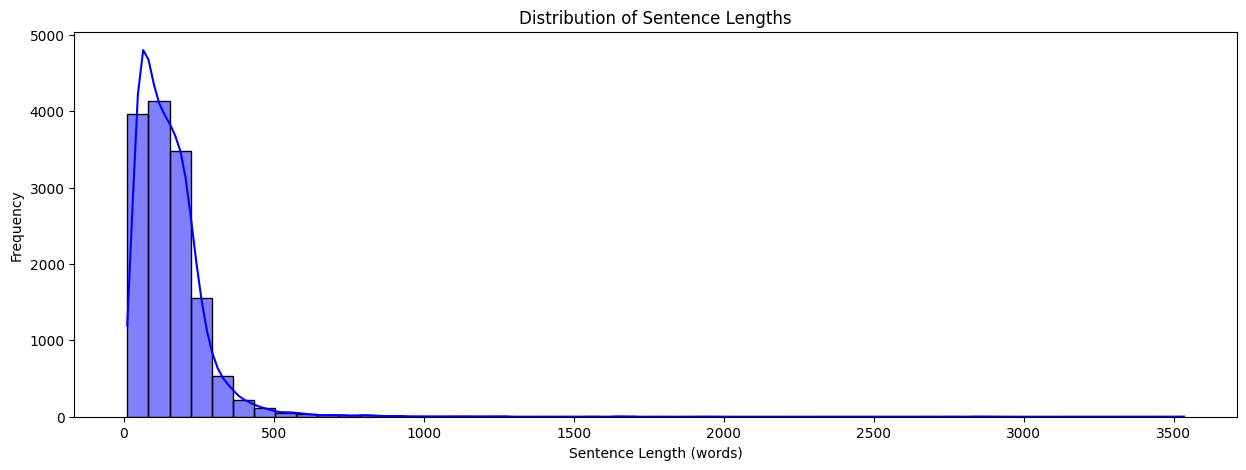

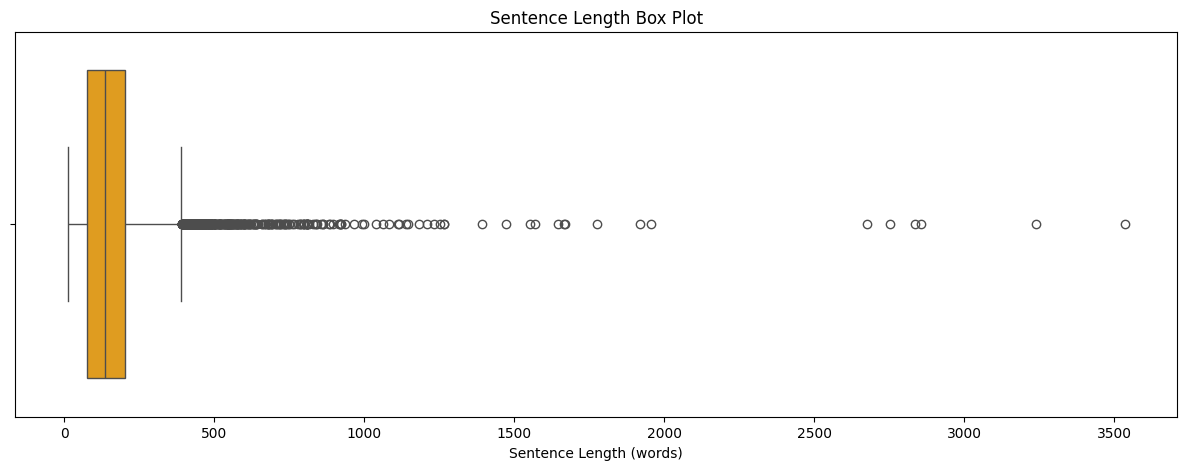

In [33]:
df['sentence_length'] = df['combined_text'].apply(lambda x: len(str(x).split()))  # Word count

# Plot histogram
plt.figure(figsize=(15, 5))
sns.histplot(df['sentence_length'], bins=50, kde=True, color='blue')
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

# Plot box plot
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['sentence_length'], color='orange')
plt.xlabel("Sentence Length (words)")
plt.title("Sentence Length Box Plot")
plt.show()

In [34]:
Q1 = df['sentence_length'].quantile(0.25)
Q3 = df['sentence_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['sentence_length'] < lower_bound) | (df['sentence_length'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

Number of outliers: 423


In [35]:
tokenizer = Tokenizer(oov_token="<UNK>")
tokenizer.fit_on_texts(all_texts)

vocab_size = len(tokenizer.word_index) + 1

encode_data = tokenizer.texts_to_sequences(all_texts)

In [71]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

token_id = 5 # Example token ID
word = reverse_word_index.get(token_id, "UNKNOWN")
print(f"Token {token_id} corresponds to word: {word}")


Token 5 corresponds to word: title


In [37]:
# Reverse mapping: {index: word}
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

# Get the first 200 token-word pairs
tokens_set = {(index, reverse_word_index[index]) for index in list(reverse_word_index.keys())[:200]}

# Print the set
print(tokens_set)


{(73, 'العام'), (5, 'title'), (157, 'المعرفه'), (71, 'دراسات'), (45, 'يمكن'), (193, 'التاريخيه'), (140, 'وعلي'), (99, 'المجتمع'), (104, 'اليوم'), (68, 'المختلفه'), (190, 'عنه'), (103, 'العلم'), (6, 'عام'), (134, 'المراه'), (36, 'علي'), (69, 'يكون'), (187, 'الشيخ'), (176, 'حصل'), (61, 'العمل'), (126, 'سلسله'), (16, 'عبد'), (123, 'موضوع'), (25, 'وهي'), (108, 'اداره'), (90, 'القاري'), (171, 'عندما'), (4, 'genres'), (46, 'وكان'), (59, 'الاسلاميه'), (80, 'الاسلامي'), (43, 'القرن'), (93, 'قصص'), (41, 'حول'), (22, 'جامعه'), (102, 'الاجتماعيه'), (83, 'عبر'), (66, 'الحديث'), (34, 'العلوم'), (23, 'كانت'), (192, 'بالاضافه'), (7, 'في'), (89, 'يتناول'), (124, 'العلمي'), (184, 'الثقافه'), (195, 'جايزه'), (17, 'العالم'), (24, 'اللغه'), (1, '<UNK>'), (101, 'الاسلام'), (180, 'من'), (174, 'الفن'), (152, 'الكتابه'), (114, 'نفسه'), (18, 'كتب'), (76, 'عالم'), (194, 'مفهوم'), (199, 'سياسة'), (132, 'العالميه'), (39, 'ولد'), (97, 'الروايه'), (74, 'انها'), (144, 'فهو'), (197, 'لان'), (50, 'العديد'), (181, 'حيا

In [133]:
# encode_data[150]

In [39]:
# Find the longest sequence length
max_sentence_length = max(len(seq) for seq in encode_data)

# Pad sequences using the dynamically determined maxlen
padded_docs = pad_sequences(encode_data, maxlen=300, padding='post')

print(padded_docs, padded_docs.shape)

[[ 2275   351   331 ...     5 14805 21846]
 [11206    44    80 ...     0     0     0]
 [43945    44    11 ...     0     0     0]
 ...
 [  599   115   145 ...     0     0     0]
 [  154     2   133 ...     0     0     0]
 [ 2393    12   534 ...     0     0     0]] (14200, 300)


In [40]:
print(vocab_size, max_sentence_length)

168033 3531


In [183]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8),
    Flatten()
])

In [184]:
sample_input = tf.convert_to_tensor(padded_docs, dtype=tf.int32)
embedded_output = model(sample_input)
print(embedded_output.shape)
print(embedded_output)

(14200, 2400)
tf.Tensor(
[[-0.01698326 -0.0156287   0.00286455 ... -0.02589084  0.04701984
   0.00807733]
 [ 0.0391393  -0.00159768 -0.02501495 ... -0.00618624  0.04618964
  -0.02021771]
 [-0.03537618 -0.04853463  0.02281097 ... -0.00618624  0.04618964
  -0.02021771]
 ...
 [ 0.04974845 -0.00406007 -0.04958236 ... -0.00618624  0.04618964
  -0.02021771]
 [ 0.01662738  0.03293612  0.00832073 ... -0.00618624  0.04618964
  -0.02021771]
 [ 0.02736462  0.02798739  0.00147684 ... -0.00618624  0.04618964
  -0.02021771]], shape=(14200, 2400), dtype=float32)


In [194]:
print(embedded_output[0])

tf.Tensor(
[-0.01698326 -0.0156287   0.00286455 ... -0.02589084  0.04701984
  0.00807733], shape=(2400,), dtype=float32)


In [186]:
query_text = ["عباس محمود العقاد"]
query_sequence = tokenizer.texts_to_sequences(query_text)
print(query_sequence)
# Pad the query to match input shape
query_padded = pad_sequences(query_sequence, maxlen=300, padding='post')

# Convert query to embedding
query_embedding = model(tf.constant(query_padded))
# print(query_embedding)
# # Print query shape
print("Query Embedding Shape:", query_embedding.shape)

[[602, 130, 509]]
Query Embedding Shape: (1, 2400)


#Similarity

In [178]:
cos_similarities = cosine_similarity(embedded_output, query_embedding)

cos_similarities = cos_similarities.flatten()

most_similar_index = np.argmax(cos_similarities)

print(f"Most Similar Index: {most_similar_index}")
print(f"Highest Cosine Similarity Score: {cos_similarities[most_similar_index]}")


Most Similar Index: 8331
Highest Cosine Similarity Score: 0.9830659031867981


In [179]:
top_n = 10
top_n_indices = np.argsort(cos_similarities)[-top_n:][::-1]  # Sort in descending order

# Print the top 10 most similar embeddings
print("Top 10 most similar indices and their cosine similarity scores:")
for rank, idx in enumerate(top_n_indices, start=1):
    print(f"Rank {rank}: Index {idx}, Similarity: {cos_similarities[idx]:.4f}")

Top 10 most similar indices and their cosine similarity scores:
Rank 1: Index 8331, Similarity: 0.9831
Rank 2: Index 1631, Similarity: 0.9778
Rank 3: Index 4464, Similarity: 0.9771
Rank 4: Index 6427, Similarity: 0.9766
Rank 5: Index 5932, Similarity: 0.9761
Rank 6: Index 6425, Similarity: 0.9723
Rank 7: Index 13519, Similarity: 0.9722
Rank 8: Index 2539, Similarity: 0.9720
Rank 9: Index 13753, Similarity: 0.9717
Rank 10: Index 8989, Similarity: 0.9715


In [180]:
all_texts[5932]

'روايي مصري | Author:  محمد صادق | Genres: nan | title: هيبتنا|'

In [181]:
from numpy import dot
from numpy.linalg import norm

query_vec = query_embedding[0]  # shape (embedding_dim,)
cosine_scores_np = []
for emb in embedded_output:
    # Cosine similarity = dot(a,b) / (norm(a)*norm(b))
    sim = dot(query_vec, emb) / (norm(query_vec) * norm(emb))
    cosine_scores_np.append(sim)

cosine_scores_np = np.array(cosine_scores_np)  # shape: (num_books,)

In [182]:
# Get the top 5 indices
top_5_indices = np.argsort(-cosine_scores_np)[:1]  # sort descending, take first 5
top_5_indices = top_5_indices.flatten()  # flatten if needed
# Retrieve corresponding rows from the DataFrame
top_5_books = df.iloc[top_5_indices]

# Print or return the results
for i, idx in enumerate(top_5_indices):
    score = cosine_scores_np[idx]
    row = df.iloc[idx]
    print(f"Rank {i+1}")
    print(f"Title: {row.get('Title', 'N/A')}")  # or row["Title"] if the column is "Title"
    print(f"Author: {row.get('Author', 'N/A')}")
    print(f"Genres: {row.get('Genres', 'N/A')}")
    print("---")

Rank 1
Title: الحب والمطر
Author:  ناديا نعامنه
Genres: nan
---


#Skill issue

In [74]:
# query_embedding_flat = tf.reduce_mean(query_embedding, axis=1)  # Average over words
# data_embeddings_flat = tf.reduce_mean(embedded_output, axis=1)  # Average over words
# print(query_embedding_flat.shape)
# print(data_embeddings_flat.shape)

# # Convert to numpy
# query_embedding_np = query_embedding_flat.numpy()
# data_embeddings_np = data_embeddings_flat.numpy()

# # Compute cosine similarity
# cos_similarities = cosine_similarity(query_embedding, embedded_output)
# cos_similarities = cos_similarities.ravel()  # Now it's (1000,)

# # Print similarity scores
# print("Cosine Similarities:", cos_similarities.shape)


In [104]:
# top_indices = np.argsort(cos_similarities)[::-1][:5]
# print("Top 5 most similar sentences:", top_indices)
# print("Similarities:", cos_similarities[top_indices])

In [105]:
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

# # Compute cosine similarity
# # cos_similarities = cosine_similarity(query_embedding_np, data_embeddings_np)[0]

# # Get the index of the most similar text
# most_similar_index = np.argmax(cos_similarities)  # Single best match
# most_similar_text = all_texts[most_similar_index]
# print(f"\n🔹 **Most Similar Text:** {most_similar_text} - Similarity: {cos_similarities[most_similar_index]}")

# # Get indices of top 10 most similar sentences (sorted in descending order)
# top_10_indices = np.argsort(-cos_similarities)[:10]  # Fix sorting issue
# #
# # Print top 10 most similar texts with their similarity scores
# print("\n🔹 **Top 10 Most Similar Sentences:**")
# for i, idx in enumerate(top_10_indices):
#     print(f"{i+1}. {idx} {all_texts[idx]} - Similarity: {cos_similarities[idx]:.4f}")
